In [20]:
# 监督学习任务
# 1. 回归，预测某个值
# 2. 分类，预测某个类别

# 从sklearn导入mnist手写数据集

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

# 注意，上面90%不会下载成功MNIST数据集
# 参考博客：https://blog.csdn.net/cckavin/article/details/86568516解决
from sklearn.datasets.base import get_data_home
print(get_data_home())


# sklearn下载下来的数据集大概都有相同的字典结构
# DESCR 键描述数据集
# data 键存放一个数组， 数组的一行表示一个样例， 一列表示一个特征
# target 键存放一个标签数组
X, y = mnist['data'], mnist['target']
print(X.shape)  # 所以MNIST数据集有70000张图片，每张图片有784个特征
print(y.shape)

C:\Users\Summerki\scikit_learn_data
(70000, 784)
(70000,)


D:\1-Anaconda\AnacondaInstall\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
D:\1-Anaconda\AnacondaInstall\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


(784,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  86 131 225 225 225   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  73
  197 253 252 252 252 252   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   4  29  29 154 187 252
  252 253 252 252 233 145   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  29 252

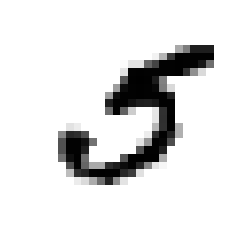

In [21]:
import matplotlib 
import matplotlib.pyplot as plt
some_digit = X[36000] # 取了第36000行
print(some_digit.shape) # 输出784
some_digit_image = some_digit.reshape(28,28) # 将其改为28*28
print(some_digit_image)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [22]:
# 上面的数字看起来像5
# 验证方法，从标签数组中进行验证
print(y[36000])

5.0


In [32]:
# MNIST数据集原本已经分好训练集和测试集了（60000+10000）
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape)

# 为了保证交叉验证，决定打乱数据集
import numpy as np

# np.random.permutation:随机排列一个序列，返回一个排列的序列
shuffle_index = np.random.permutation(60000)
print(shuffle_index)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]    # 这里将训练集都打乱了
print(X_train)
print(y_train)

(60000, 784)
[  515 19289 18948 ... 41243  4443 12829]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0 158 254 255 231  61   3   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 157 253 253
 253 253  48   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 109 253 253 253 253 228  41   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 114
 253 253 253 253 253 204   9   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 157 253 253 253 253 253 253 128   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

In [36]:
# 这个cell块是为了验证上面的cell块是干什么用的
# 得出结论：把train、test数组内容不变，只是将顺序打乱
# train = np.array([1,2,3,4,5,6])
# test = np.array([1,2,3,4,5,6])

# shuffle = np.random.permutation(6)
# print(shuffle)

# train, test = train[shuffle], test[shuffle]
# print("train:",train)
# print("test:",test)

[4 5 0 3 1 2]
train: [5 6 1 4 2 3]
test: [5 6 1 4 2 3]


In [42]:
# 训练一个二分类器
# 识别数字5，只有两种结果：5或非5

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

D:\1-Anaconda\AnacondaInstall\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([ True])